<a href="https://colab.research.google.com/github/bran1233/curso-machine-learning/blob/main/Python/Supervised_models/DecisionTrees_Boosting/Lab_Santander.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5>Santander Customer Satisfaction
</font></h1>

---

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Introducción</a>  
2. <a href="#item32">Santander Problem</a>  
3. <a href="#item33">Descargar y limpiar el Dataset</a>  
4. <a href="#item34">SMOTE Algorithm</a>  
5. <a href="#item34">Decision Trees</a>  
7. <a href="#item34">Cross Validation y GridSearch</a>  
6. <a href="#item34">Random Forest</a>  
8. <a href="#item34">AdaBoost</a>  
9. <a href="#item34">XGBoost</a>
10. <a href="#item34">RandomSearch</a>
11. <a href="#item34">¿Cómo implementar un modelo?</a>  

</font>
</div>

## Introducción


En este laboratorio, aprenderá a usar python para construir modelos de ensemble.


<h3>Objetivo de este Notebook<h3>    
<h5> 1. Como construir e interpretar un modelo de ensemble.</h5>
<h5> 2. Descargar y limpiar un Dataset </h5>
<h5> 3. Realizar los pasos necesarios previos a la etapa de modelamiento </h5>
<h5> 4. Entrenar y Testear modelo </h5>     

Primero, importemos algunos módulos que necesitaremos para el análisis y construcción del modelo.

In [1]:

# Scikit-Learn
import sklearn
assert sklearn.__version__ >= "0.20"

# Imports comunes
import pandas as pd
import numpy as np
import os

# Configuración de tamaño de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore las advertencias poco útiles
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Santander Customer Satisfaction


Desde los equipos de soporte de primera línea hasta los ejecutivos, la satisfacción del cliente es una medida clave del éxito de una empresa. Los clientes insatisfechos no se quedan. Es más, los clientes insatisfechos rara vez expresan su insatisfacción antes de irse.

El banco Santander está pidiendo a la comunidad data scientist que los ayude a identificar clientes insatisfechos desde su primera interacción. Hacerlo permitiría a Santander tomar medidas proactivas para mejorar la felicidad de un cliente antes de que sea demasiado tarde.

En este laboratorio, trabajará con cientos de variables anónimas para predecir si un cliente está satisfecho o insatisfecho con su experiencia bancaria.

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/4986/media/santander_custsat_red.png" alt="HTML5 Icon" style="width: 600px; height: 450px;">
<div style="text-align: center">¿Qué clientes son clientes satisfechos? </div>


<b>Descripción de datos</b>

El data frame de Santander tiene 76,020 filas y 371 columnas.


---

Se le proporciona un conjunto de datos anónimos que contiene una gran cantidad de variables numéricas. La columna <b>"OBJETIVO"</b> es la variable a predecir. Es igual a uno para clientes insatisfechos y 0 para clientes satisfechos.

La tarea consiste en predecir la probabilidad de que cada cliente del conjunto de prueba sea un cliente insatisfecho.


---


<strong>Puede consultar este [link](https://www.kaggle.com/c/santander-customer-satisfaction/overview) para leer más sobre la fuente de datos Santander.</strong>


## Descargar y limpiar Dataset


In [2]:
# Cargar Data
import pandas as pd
pddf = pd.read_csv("santander.csv")
pddf.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
pddf.shape

(76020, 371)

In [4]:
# Cargar seaborn
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})

<Axes: xlabel='TARGET', ylabel='count'>

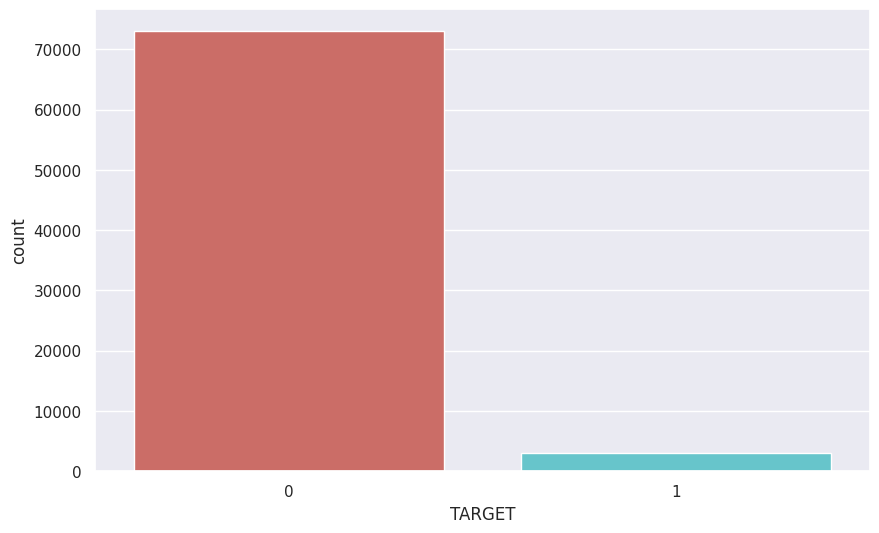

In [5]:
# Analizando el target
sns.countplot(x = 'TARGET', data = pddf, palette = 'hls')


In [6]:
pddf.groupby('TARGET')['ID'].count()

TARGET
0    73012
1     3008
Name: ID, dtype: int64

In [7]:
pddf[['TARGET']].describe()

,TARGET
count,76020.000000
mean,0.039569
std,0.194945
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [8]:
# Indentificar las variables

features = list(set(pddf.columns.tolist()) - set(['ID','TARGET']))
features

['ind_var40',
 'saldo_var1',
 'saldo_medio_var33_ult3',
 'ind_var28',
 'num_var37_0',
 'saldo_medio_var12_hace2',
 'num_op_var40_comer_ult3',
 'imp_aport_var17_hace3',
 'ind_var6',
 'saldo_medio_var5_hace3',
 'ind_var41',
 'delta_imp_reemb_var33_1y3',
 'delta_num_reemb_var13_1y3',
 'saldo_var31',
 'saldo_var24',
 'num_var40',
 'ind_var17_0',
 'ind_var20_0',
 'delta_num_aport_var13_1y3',
 'saldo_medio_var17_hace2',
 'ind_var24',
 'num_reemb_var33_ult1',
 'ind_var37',
 'saldo_var13_largo',
 'imp_aport_var13_ult1',
 'imp_reemb_var13_hace3',
 'saldo_var44',
 'num_op_var39_comer_ult1',
 'num_trasp_var17_out_hace3',
 'saldo_medio_var29_ult3',
 'num_ent_var16_ult1',
 'ind_var41_0',
 'saldo_medio_var33_hace3',
 'ind_var33_0',
 'imp_trasp_var33_out_hace3',
 'ind_var30',
 'num_meses_var13_corto_ult3',
 'num_var14_0',
 'delta_imp_trasp_var17_in_1y3',
 'num_meses_var8_ult3',
 'saldo_medio_var17_ult3',
 'num_op_var39_efect_ult3',
 'num_var29',
 'num_reemb_var13_hace3',
 'imp_compra_var44_hace3',
 '

In [9]:
# Determinando matrices de datos

X = pddf[features]
y = pddf.TARGET


In [10]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)


In [11]:
y_train.mean()

0.039576051415041155

In [12]:
y_test.mean()

0.03955099535210033

# SMOTE Algorithm


<b>Synthetic Minority Oversampling Technique</b>

Es uno de los métodos de sobremuestreo más utilizados para resolver el problema del desbalanceo.
Su objetivo es equilibrar la distribución de clases aumentando aleatoriamente los ejemplos de clases minoritarias al replicarlos.


SMOTE sintetiza nuevas instancias minoritarias entre instancias minoritarias existentes. Genera los registros de entrenamiento virtual por interpolación lineal para la clase minoritaria. Estos registros de entrenamiento sintéticos se generan seleccionando aleatoriamente uno o más de los k vecinos más cercanos para cada ejemplo en la clase minoritaria. Después del proceso de sobremuestreo, los datos se reconstruyen y se pueden aplicar varios modelos de clasificación para los datos procesados.
¡Más información detallada sobre cómo funciona el algoritmo SMOTE!

<strong>Puede consultar este [link](https://imbalanced-learn.org/stable/generated/imblearn.over_sampling.SMOTE.html) para leer más sobre SMOTE.</strong>

<img src="https://i.ytimg.com/vi/U3X98xZ4_no/maxresdefault.jpg" alt="HTML5 Icon" style="width: 400px; height: 250px;">





In [13]:
# Aplicando SMOTE para oversampling

from imblearn.over_sampling import SMOTE


In [14]:
sm = SMOTE(random_state = 123)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


<Axes: xlabel='TARGET', ylabel='count'>

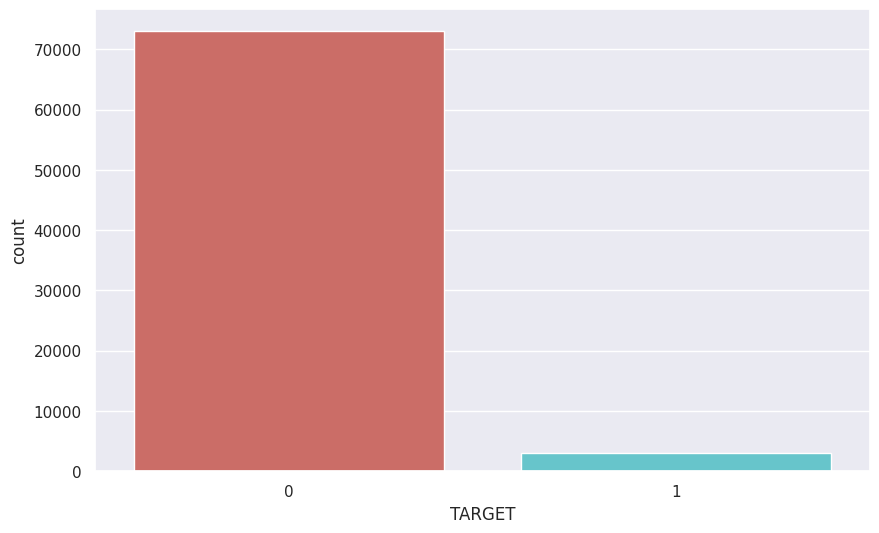

In [15]:
# Analizando el target
sns.countplot(x = y, palette = 'hls')

<Axes: ylabel='count'>

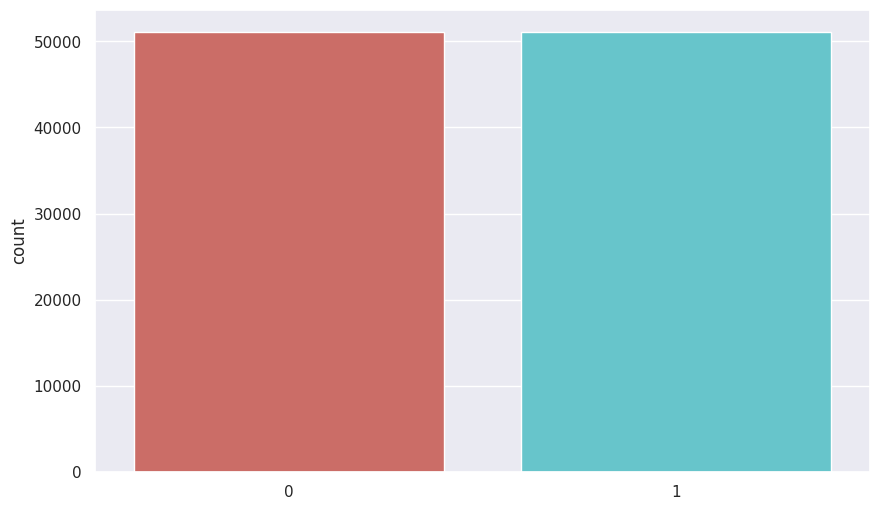

In [16]:
# Analizando el target
sns.countplot(x = y_train_res, palette = 'hls')

# Decision Tree

In [17]:
# Cargar librerías

from sklearn.tree import DecisionTreeClassifier


In [18]:
# Definiendo modelo


dtree = DecisionTreeClassifier(max_depth = 5,
                               #class_weight = {0: 1, 1: 25.272},
                               min_samples_leaf = 0.05,
                               random_state = 123)

dtree = dtree.fit(X_train_res, y_train_res)

dtree

DecisionTreeClassifier(max_depth=5, min_samples_leaf=0.05, random_state=123)

In [19]:
# Graficando resultados

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(dtree,
                           feature_names = features,
                           filled = True,
                           rounded = True,
                           special_characters = True)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
print(graph)


<b>Bondad de ajuste</b>

In [20]:
# Usando el modelo para predecir

X_train['probability'] = dtree.predict_proba(X_train[features])[:,1]
X_test['probability']  = dtree.predict_proba(X_test[features])[:,1]

X_train['prediction'] = dtree.predict(X_train[features])
X_test['prediction']  = dtree.predict(X_test[features])

In [21]:
#Resumen de todas las métricas del modelo
from sklearn.metrics import *

metricsDtree_smote = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_smote_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_smote_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsDtree_smote

,metric,dTree_smote_train,dTree_smote_test
0,AUC,0.800894,0.799110
1,Gini,0.601789,0.598221
2,Accuracy,0.783309,0.788389
3,Precision,0.112491,0.115143
4,Recall,0.649573,0.650776
5,F1-score,0.191771,0.195667


### balanceo por pesos

In [22]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)


In [23]:
X_train

,ind_var40,saldo_var1,saldo_medio_var33_ult3,ind_var28,num_var37_0,saldo_medio_var12_hace2,num_op_var40_comer_ult3,imp_aport_var17_hace3,ind_var6,saldo_medio_var5_hace3,...,num_var46_0,ind_var14,saldo_var14,delta_num_compra_var44_1y3,imp_compra_var44_ult1,ind_var39,num_var22_ult1,ind_var7_emit_ult1,saldo_medio_var8_ult3,num_op_var41_ult1
65891,0,0.0,0.0,0,0,0.0,0,0.0,0,7.80,...,0,0,0.0,0.0,0.0,0,0,0,0.0,0
62390,0,0.0,0.0,0,0,0.0,0,0.0,0,3.84,...,0,0,0.0,0.0,0.0,0,0,0,0.0,0
23274,0,0.0,0.0,0,0,0.0,0,0.0,0,2.82,...,0,0,0.0,0.0,0.0,0,0,0,0.0,0
50111,0,0.0,0.0,0,0,0.0,0,0.0,0,0.00,...,0,0,0.0,0.0,0.0,0,0,0,0.0,0
50402,0,0.0,0.0,0,0,0.0,0,0.0,0,0.00,...,0,0,0.0,0.0,0.0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13346,0,0.0,0.0,0,0,0.0,0,0.0,0,0.00,...,0,0,0.0,0.0,0.0,0,0,0,0.0,0
41650,0,0.0,0.0,0,0,0.0,0,0.0,0,0.00,...,0,0,0.0,0.0,0.0,0,0,0,0.0,0
11784,0,0.0,0.0,0,3,0.0,0,0.0,0,10.95,...,0,0,0.0,0.0,0.0,0,0,0,0.0,12
63324,0,0.0,0.0,0,0,0.0,0,0.0,0,1.92,...,0,0,0.0,0.0,0.0,0,0,0,0.0,0


In [24]:
y_train.shape[0] - y_train.sum()

51108

In [25]:
y_train.sum()

2106

In [26]:
(y_train.shape[0] - y_train.sum())/y_train.sum()

24.267806267806268

In [27]:
# Definiendo modelo


dtree = DecisionTreeClassifier(max_depth = 5,
                               class_weight = {0: 1, 1: 24.267},
                               min_samples_leaf = 0.05,
                               random_state = 123)

dtree = dtree.fit(X_train, y_train)

dtree

DecisionTreeClassifier(class_weight={0: 1, 1: 24.267}, max_depth=5,
                       min_samples_leaf=0.05, random_state=123)

In [28]:
# Usando el modelo para predecir

X_train['probability'] = dtree.predict_proba(X_train[features])[:,1]
X_test['probability']  = dtree.predict_proba(X_test[features])[:,1]

X_train['prediction'] = dtree.predict(X_train[features])
X_test['prediction']  = dtree.predict(X_test[features])

In [29]:
#Resumen de todas las métricas del modelo
from sklearn.metrics import *

metricsDtree_w = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_w_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_w_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsDtree_w

,metric,dTree_w_train,dTree_w_test
0,AUC,0.820066,0.803175
1,Gini,0.640132,0.606351
2,Accuracy,0.704645,0.707402
3,Precision,0.099323,0.095472
4,Recall,0.801045,0.754989
5,F1-score,0.176732,0.169508


In [30]:
# Definiendo modelo

dtree_unb = DecisionTreeClassifier(max_depth = 5,
                               min_samples_leaf = 0.05,
                               random_state = 123)

dtree_unb = dtree_unb.fit(X_train[features], y_train)

# Usando el modelo para predecir

X_train['probability_unb'] = dtree_unb.predict_proba(X_train[features])[:,1]
X_test['probability_unb']  = dtree_unb.predict_proba(X_test[features])[:,1]

X_train['prediction_unb'] = dtree_unb.predict(X_train[features])
X_test['prediction_unb']  = dtree_unb.predict(X_test[features])

#Resumen de todas las métricas del modelo
metricsDtree_unb = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_unb_train':[roc_auc_score(y_train, X_train.probability_unb),
                                        (roc_auc_score(y_train, X_train.probability_unb)*2-1),
                                        accuracy_score(y_train, X_train.prediction_unb),
                                        precision_score(y_train, X_train.prediction_unb),
                                        recall_score(y_train, X_train.prediction_unb),
                                        f1_score(y_train, X_train.prediction_unb)],

                                'dTree_unb_test':[roc_auc_score(y_test, X_test.probability_unb),
                                        (roc_auc_score(y_test, X_test.probability_unb)*2-1),
                                        accuracy_score(y_test, X_test.prediction_unb),
                                        precision_score(y_test, X_test.prediction_unb),
                                        recall_score(y_test, X_test.prediction_unb),
                                        f1_score(y_test, X_test.prediction_unb)]})


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
temp = pd.merge(metricsDtree_smote, metricsDtree_w, on = ['metric'], how= 'left')
pd.merge(temp, metricsDtree_unb, on = ['metric'], how= 'left')



,metric,dTree_smote_train,dTree_smote_test,dTree_w_train,dTree_w_test,dTree_unb_train,dTree_unb_test
0,AUC,0.800894,0.799110,0.820066,0.803175,0.823127,0.804982
1,Gini,0.601789,0.598221,0.640132,0.606351,0.646253,0.609964
2,Accuracy,0.783309,0.788389,0.704645,0.707402,0.960424,0.960449
3,Precision,0.112491,0.115143,0.099323,0.095472,0.000000,0.000000
4,Recall,0.649573,0.650776,0.801045,0.754989,0.000000,0.000000
5,F1-score,0.191771,0.195667,0.176732,0.169508,0.000000,0.000000


In [32]:
X_train['TARGET'] = y_train

<Axes: >

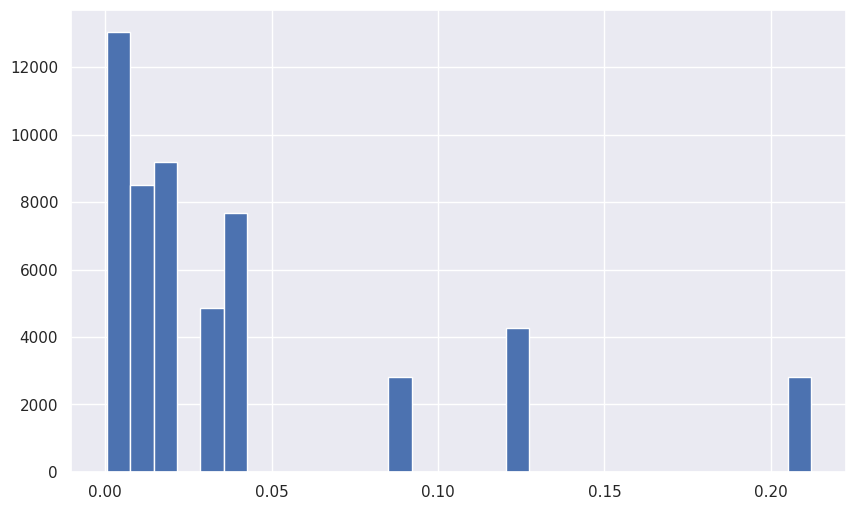

In [33]:
X_train.probability_unb.hist(bins = 30)

In [34]:
X_train.loc[X_train.probability_unb < 0.04].TARGET.mean()

0.016576626494897724

<Axes: >

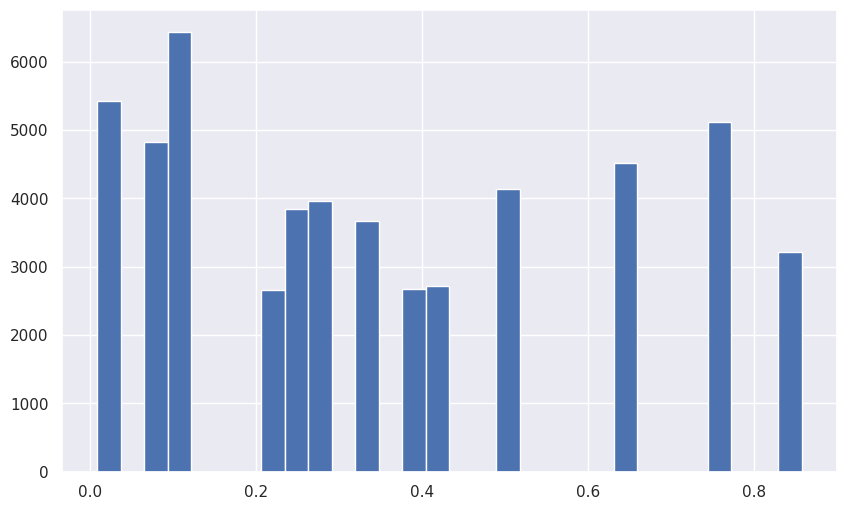

In [35]:
X_train.probability.hist(bins = 30)

In [36]:
X_train.loc[X_train.probability < 0.04].TARGET.mean()

0.0007365126127784938

# Cross Validation



<b>evaluar el desempeño del estimador</b>

 ---

Aprender los parámetros de una función de predicción y probarlos con los mismos datos es un error metodológico: un modelo que simplemente repetiría las etiquetas de las muestras que acaba de ver tendría una puntuación perfecta, pero no podría predecir nada útil datos no vistos.
Esta situación se llama Overfitting. Para evitarlo, es una práctica común cuando se realiza un modelo de machine learning (supervisado) mantener parte de los datos disponibles como un conjunto de pruebas X_test, y_test.



Al evaluar diferentes configuraciones ("hiperparámetros") para estimadores, todavía existe el riesgo de Overfitting en el conjunto de prueba porque los parámetros se pueden ajustar hasta que el estimador funcione de manera óptima. De esta manera, el conocimiento sobre el conjunto de pruebas puede "filtrarse" en el modelo y las métricas de evaluación ya no informan sobre el desempeño de generalización. Para resolver este problema, se puede presentar otra parte del conjunto de datos como el llamado "conjunto de validación": el entrenamiento continúa en el conjunto de entrenamiento, después de lo cual se realiza la evaluación en el conjunto de validación y cuando el experimento parece tener éxito , la evaluación final se puede realizar en el equipo de prueba.





Sin embargo, al dividir los datos disponibles en tres conjuntos, reducimos drásticamente la cantidad de muestras que se pueden usar para aprender el modelo, y los resultados pueden depender de una elección aleatoria particular para el par de conjuntos (entrenamiento, validación).


Una solución a este problema es un procedimiento llamado validación cruzada. Un conjunto de prueba aún debe mantenerse para la evaluación final, pero el conjunto de validación ya no es necesario al hacer CV. En el enfoque básico, llamado k-fold CV, el conjunto de entrenamiento se divide en k conjuntos más pequeños . Se sigue el siguiente procedimiento para cada uno de los k "folds":







1.   Se entrena un modelo utilizando los folds como datos de entrenamiento

2.   El modelo resultante se valida en la parte restante de los datos (es decir, se utiliza como un conjunto de prueba para calcular una medida de rendimiento como la precisión)


<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" alt="HTML5 Icon" style="width: 400px; height: 250px;">

---

La medida de rendimiento informada por la validación cruzada de k veces es el promedio de los valores calculados en el ciclo. Este enfoque puede ser computacionalmente costoso, pero no desperdicia demasiados datos (como es el caso cuando se fija un conjunto de validación arbitrario), lo cual es una gran ventaja en problemas como la inferencia inversa donde el número de muestras es muy pequeño.

---


<strong>Puede consultar este [link](https://scikit-learn.org/stable/modules/cross_validation.html) para leer más sobre CrossValidation.</strong>







In [37]:
# Cargar librerías para grid search

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *


In [38]:
# Definiendo los parámetros a probar

parameters = {'max_depth': np.linspace(2, 15, 14),
              'min_samples_leaf' : np.array([0.01, 0.025, 0.05, 0.1, 0.2])}


In [39]:
# Definiendo modelo

dtree = DecisionTreeClassifier(random_state = 123)


In [40]:
# Ejecutando grid search con 5 folds

#GridSearch = GridSearchCV(dtree, parameters, cv = 5, verbose = 5, n_jobs = 5,
#                          refit = 'AUC',
#                          return_train_score = True)

#GridSearch.fit(X_train_res, y_train_res.ravel())
#elapsed:  4.6min finished


In [41]:
#GridSearch.best_params_

In [42]:
def plot_search_results(grid):
    """
    Params:
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

In [43]:
# Calling Method
#plot_search_results(GridSearch)


In [44]:
# Entrenamiento Óptimizado

dtree = DecisionTreeClassifier(max_depth = 6,
                               min_samples_leaf = 0.01,
                               random_state = 123)

dtree = dtree.fit(X_train_res, y_train_res)

dtree

DecisionTreeClassifier(max_depth=6, min_samples_leaf=0.01, random_state=123)

In [45]:
# Graficando resultados

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(dtree,
                           feature_names = features,
                           filled = True,
                           rounded = True,
                           special_characters = True)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
print(graph)

<b>Bondad de ajuste</b>

In [46]:
# Usando el modelo para predecir

X_train['probability'] = dtree.predict_proba(X_train[features])[:,1]
X_test['probability']  = dtree.predict_proba(X_test[features])[:,1]

X_train['prediction'] = dtree.predict(X_train[features])
X_test['prediction']  = dtree.predict(X_test[features])


In [47]:
#Resumen de todas las métricas del modelo

metricsDtreeOpt = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsDtreeOpt

,metric,dTree_train,dTree_test
0,AUC,0.808261,0.798188
1,Gini,0.616523,0.596376
2,Accuracy,0.819127,0.818776
3,Precision,0.133041,0.129727
4,Recall,0.647198,0.627494
5,F1-score,0.220711,0.215005


In [48]:
pd.merge(metricsDtree_smote, metricsDtreeOpt, on = 'metric', how='left')

,metric,dTree_smote_train,dTree_smote_test,dTree_train,dTree_test
0,AUC,0.800894,0.799110,0.808261,0.798188
1,Gini,0.601789,0.598221,0.616523,0.596376
2,Accuracy,0.783309,0.788389,0.819127,0.818776
3,Precision,0.112491,0.115143,0.133041,0.129727
4,Recall,0.649573,0.650776,0.647198,0.627494
5,F1-score,0.191771,0.195667,0.220711,0.215005


<b>Importancias del modelo</b>

In [49]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)

In [50]:

importances = pd.DataFrame({'features' : X_train.columns.tolist() ,
                            'importance' : dtree.feature_importances_}).sort_values('importance', ascending = False)

importances.loc[importances.importance > 0]

,features,importance
35,ind_var30,0.489974
100,var15,0.279941
122,saldo_var30,0.068178
92,imp_op_var41_efect_ult3,0.044416
121,var38,0.039116
213,saldo_var37,0.021745
280,ind_var37_cte,0.018887
277,num_var22_ult3,0.015894
365,num_var22_ult1,0.006266
117,num_var4,0.005822


# Random Forest

In [51]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)



In [52]:
# Cargando librerías

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import time


In [53]:
# Configurando modelo de random forest

rfc = RandomForestClassifier(n_estimators = 100,
                             max_depth = 6,
                             min_samples_leaf = 0.01,
                             class_weight = {0: 1, 1: 24.267},
                             oob_score = True,
                             verbose = 1,
                             n_jobs = 4,
                             random_state = 123)

#oob_score: Out of bagging score, es el desempeño del modelo en la muestra que se
#queda fuera del proceso de extraccion de subespacios de la data
#es importante analizarlo por si el modelo deja fuera algunas caracteristicas importantes de la data

In [54]:
# Configurando modelo de random forest

rfc = RandomForestClassifier(n_estimators = 100,

                             max_depth = 6,
                             min_samples_leaf = 0.01,

                             max_features = 'sqrt',
                             bootstrap = True,
                             max_samples = 0.6,

                             class_weight = {0: 1, 1: 24.267},

                             oob_score = True,
                             verbose = 1,
                             n_jobs = 2,
                             random_state = 123)

#oob_score: Out of bagging score, es el desempeño del modelo en la muestra que se
#queda fuera del proceso de extraccion de subespacios de la data
#es importante analizarlo por si el modelo deja fuera algunas caracteristicas importantes de la data

In [55]:
import multiprocessing
multiprocessing.cpu_count()

2

In [56]:

start_time = time.time()
rfc = rfc.fit(X_train, y_train)
print("----%s seconds ---" % ((time.time() - start_time)))


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.4s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    4.4s finished


----7.959833383560181 seconds ---


In [57]:
importances = pd.DataFrame({'features' : X_train.columns.tolist() ,
                            'importance' : rfc.feature_importances_}).sort_values('importance', ascending = False)

importances.loc[importances.importance > 0]

,features,importance
100,var15,0.150776
255,saldo_var42,0.076371
122,saldo_var30,0.069494
302,saldo_var5,0.054759
35,ind_var30,0.051317
...,...,...
367,saldo_medio_var8_ult3,0.000066
174,num_var43_recib_ult1,0.000047
27,num_op_var39_comer_ult1,0.000044
30,num_ent_var16_ult1,0.000025


In [58]:
# Usando el modelo para predecir

X_train['probability'] = rfc.predict_proba(X_train[features])[:,1]
X_test['probability']  = rfc.predict_proba(X_test[features])[:,1]

X_train['prediction'] = rfc.predict(X_train[features])
X_test['prediction']  = rfc.predict(X_test[features])



[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


In [59]:
#Resumen de todas las métricas del modelo

metricsRfc = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'rfc_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'rfc_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})


metricsRes = pd.merge(metricsDtree_smote, metricsRfc, on = 'metric', how='left')
metricsRes

,metric,dTree_smote_train,dTree_smote_test,rfc_train,rfc_test
0,AUC,0.800894,0.799110,0.802473,0.800498
1,Gini,0.601789,0.598221,0.604947,0.600995
2,Accuracy,0.783309,0.788389,0.713891,0.714066
3,Precision,0.112491,0.115143,0.090773,0.091108
4,Recall,0.649573,0.650776,0.690883,0.694013
5,F1-score,0.191771,0.195667,0.160463,0.161070


# AdaBoost

In [60]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)


In [61]:
# Cargando librerías

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import time


In [62]:
# Configuramos el modelo de adaboost

ada_clf = AdaBoostClassifier(
          DecisionTreeClassifier(max_depth = 1),
          n_estimators = 200,
          algorithm = 'SAMME.R',
          learning_rate = 0.5,
          random_state = 123)


In [63]:
start_time = time.time()
ada_clf.fit(X_train[features], y_train)
print("----%s seconds ---" % ((time.time() - start_time)))


----64.26526737213135 seconds ---


In [64]:
importances = pd.DataFrame({'features' : X_train.columns.tolist() ,
                            'importance' : ada_clf.feature_importances_}).sort_values('importance', ascending = False)

importances.loc[importances.importance > 0]

,features,importance
121,var38,0.075
100,var15,0.065
9,saldo_medio_var5_hace3,0.050
122,saldo_var30,0.050
80,imp_op_var39_comer_ult1,0.040
...,...,...
332,saldo_medio_var13_corto_hace3,0.005
337,imp_op_var39_ult1,0.005
110,imp_op_var41_efect_ult1,0.005
358,num_op_var39_efect_ult1,0.005


In [65]:
# Usando el modelo para predecir

X_train['probability'] = ada_clf.predict_proba(X_train[features])[:,1]
X_test['probability']  = ada_clf.predict_proba(X_test[features])[:,1]

X_train['prediction'] = ada_clf.predict(X_train[features])
X_test['prediction']  = ada_clf.predict(X_test[features])



In [66]:
#Resumen de todas las métricas del modelo

metricsAdab = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'adab_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'adab_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})


metricsRes = pd.merge(metricsRes, metricsAdab, on = 'metric', how='left')
metricsRes

,metric,dTree_smote_train,dTree_smote_test,rfc_train,rfc_test,adab_train,adab_test
0,AUC,0.800894,0.799110,0.802473,0.800498,0.858622,0.821658
1,Gini,0.601789,0.598221,0.604947,0.600995,0.717244,0.643317
2,Accuracy,0.783309,0.788389,0.713891,0.714066,0.960631,0.960405
3,Precision,0.112491,0.115143,0.090773,0.091108,0.720000,0.444444
4,Recall,0.649573,0.650776,0.690883,0.694013,0.008547,0.004435
5,F1-score,0.191771,0.195667,0.160463,0.161070,0.016893,0.008782


# XGBoost

In [67]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    train_size = 0.6,
                                                    random_state = 123)

X_watch, X_test, y_watch, y_test = train_test_split(X_test, y_test,
                                                    stratify = y_test,
                                                    train_size = 0.5,
                                                    random_state = 123)


In [68]:
print("El tamaño de train es:", len(X_train))
print("El tamaño de test es:", len(X_test))
print("El tamaño de watchlist es:", len(X_watch))

El tamaño de train es: 45612
El tamaño de test es: 15204
El tamaño de watchlist es: 15204


In [69]:
# Cargando librerías
import numpy as np
import xgboost as xgb


In [71]:

dtrain = xgb.DMatrix(X_train, label = y_train)
dwatch = xgb.DMatrix(X_watch, label = y_watch)
dtest  = xgb.DMatrix(X_test, label = y_test)


In [72]:
# Definiendo parámetros

param = {'objective' : 'binary:logistic',
         'max_depth' : 8,
         'learning_rate': 0.1,
         'min_child_weight' : 100,
         'grow_policy' : 'lossguide',
         'sub_sample':0.7,
         'colsample_bytree':0.7,
         'seed' : 123}

param['eval_metric'] = 'auc'
num_round = 500
evallist = [(dtrain,'train'), (dwatch,'watchlist')]



In [ ]:
# Definiendo parámetros, 2DA FASE

param = {'objective' : 'binary:logistic',
         'max_depth' : 8,
         'learning_rate': 0.1,
         'min_child_weight' : 100,
         'grow_policy' : 'lossguide',
         'subsample' : 0.7,
         'colsample_bytree' : 0.7,
         'scale_pos_weight' : 24,
         'seed' : 123}

param['eval_metric'] = 'auc'
num_round = 500
evallist = [(dtrain, 'train'), (dwatch,'watchlist')]

In [73]:
import time

start_time = time.time()
xgBoost = xgb.train(param, dtrain, num_round, evallist,
                    early_stopping_rounds = 5)
print("----%s seconds ---" % ((time.time() - start_time)))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:41:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "sub_sample" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-auc:0.83098	watchlist-auc:0.79919
[1]	train-auc:0.83236	watchlist-auc:0.80084
[2]	train-auc:0.83622	watchlist-auc:0.80644
[3]	train-auc:0.83427	watchlist-auc:0.81262
[4]	train-auc:0.83749	watchlist-auc:0.81416
[5]	train-auc:0.83903	watchlist-auc:0.81473
[6]	train-auc:0.83976	watchlist-auc:0.81434
[7]	train-auc:0.83960	watchlist-auc:0.81354
[8]	train-auc:0.83986	watchlist-auc:0.81283
[9]	train-auc:0.84085	watchlist-auc:0.81556
[10]	train-auc:0.84180	watchlist-auc:0.81552
[11]	train-auc:0.84236	watchlist-auc:0.81567
[12]	train-auc:0.84255	watchlist-auc:0.81556
[13]	train-auc:0.84316	watchlist-auc:0.81548
[14]	train-auc:0.84331	watchlist-auc:0.81516
[15]	train-auc:0.84278	watchlist-auc:0.81430
----3.574096918106079 seconds ---


<b>Variables del Modelo</b>

In [74]:
importance = xgBoost.get_score(importance_type = 'total_gain')
importance

{'saldo_medio_var5_hace3': 154.24151611328125,
 'ind_var41_0': 16.47406578063965,
 'saldo_medio_var5_hace2': 116.39568328857422,
 'saldo_medio_var5_ult3': 20.991090774536133,
 'num_meses_var39_vig_ult3': 7.455526351928711,
 'var36': 22.277923583984375,
 'num_var35': 614.2957763671875,
 'num_med_var45_ult3': 9.001302719116211,
 'imp_op_var39_efect_ult1': 48.19464111328125,
 'imp_op_var41_efect_ult3': 158.83590698242188,
 'var15': 4947.07568359375,
 'num_var45_ult1': 21.961456298828125,
 'num_var45_hace2': 2.5925865173339844,
 'imp_op_var41_efect_ult1': 86.9193115234375,
 'var38': 826.2386474609375,
 'saldo_var30': 2859.533935546875,
 'num_var45_hace3': 30.975967407226562,
 'imp_op_var39_efect_ult3': 4.202545166015625,
 'ind_var10_ult1': 2.35809326171875,
 'num_var30_0': 27.328720092773438,
 'saldo_var37': 0.60205078125,
 'ind_var39_0': 17.36687660217285,
 'saldo_var42': 147.06539916992188,
 'num_op_var39_ult3': 12.92453384399414,
 'saldo_medio_var5_ult1': 143.89305114746094,
 'num_op_va

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

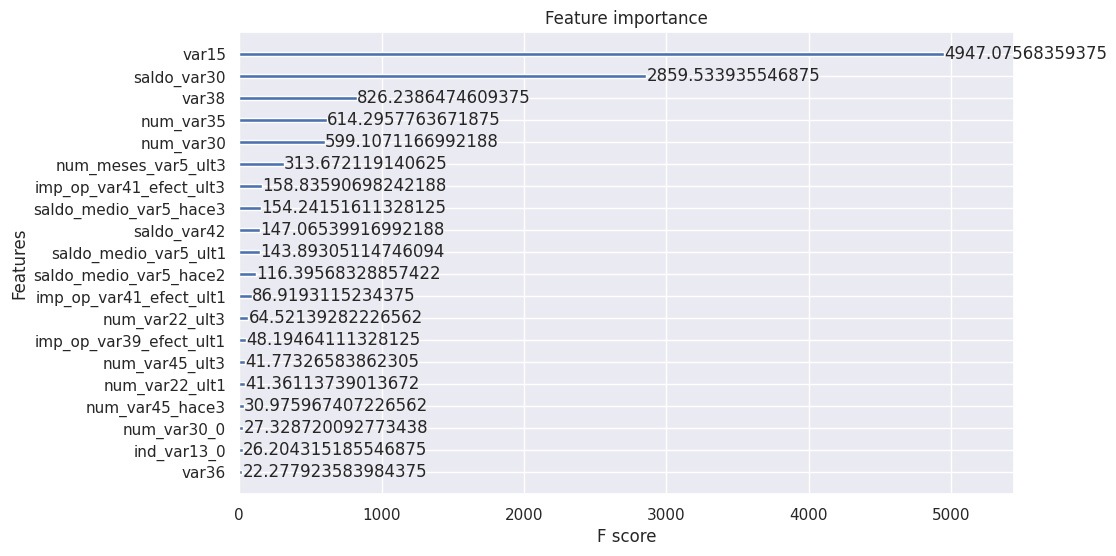

In [75]:
xgb.plot_importance(xgBoost, max_num_features=20, importance_type = 'total_gain')

In [76]:
pdVarImp = pd.DataFrame({'Feature': list(importance.keys()),
                         'Importance' : list(importance.values())}).sort_values('Importance', ascending = False)

pdVarImp['C'] = np.arange(len(pdVarImp)) + 1
pdVarImp

,Feature,Importance,C
10,var15,4947.075684,1
15,saldo_var30,2859.533936,2
14,var38,826.238647,3
6,num_var35,614.295776,4
27,num_var30,599.107117,5
34,num_meses_var5_ult3,313.672119,6
9,imp_op_var41_efect_ult3,158.835907,7
0,saldo_medio_var5_hace3,154.241516,8
22,saldo_var42,147.065399,9
24,saldo_medio_var5_ult1,143.893051,10


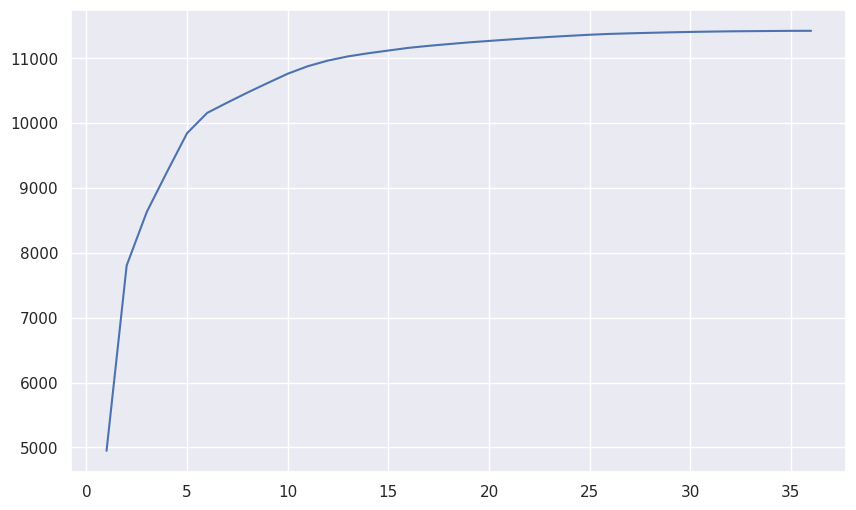

In [77]:
plt.plot(pdVarImp.C,pdVarImp.Importance.cumsum(axis=0))

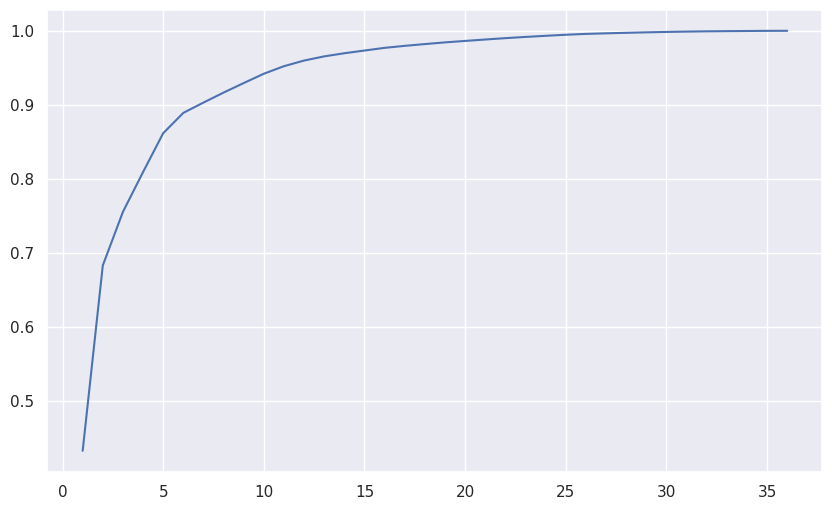

In [78]:
pdVarImp['porc_gain'] = pdVarImp.Importance.apply(lambda x: x/pdVarImp.Importance.sum())
plt.plot(pdVarImp.C,pdVarImp.porc_gain.cumsum(axis=0))

In [79]:
pdVarImp['porc_gain_acum'] = pdVarImp.porc_gain.cumsum(axis = 0)


In [80]:
pdVarImp.head(50)

,Feature,Importance,C,porc_gain,porc_gain_acum
10,var15,4947.075684,1,0.432963,0.432963
15,saldo_var30,2859.533936,2,0.250263,0.683226
14,var38,826.238647,3,0.072312,0.755538
6,num_var35,614.295776,4,0.053763,0.809300
27,num_var30,599.107117,5,0.052433,0.861734
34,num_meses_var5_ult3,313.672119,6,0.027452,0.889186
9,imp_op_var41_efect_ult3,158.835907,7,0.013901,0.903087
0,saldo_medio_var5_hace3,154.241516,8,0.013499,0.916586
22,saldo_var42,147.065399,9,0.012871,0.929457
24,saldo_medio_var5_ult1,143.893051,10,0.012593,0.942051


In [81]:
# Usando el modelo para predecir

X_train['probability']  = xgBoost.predict(xgb.DMatrix(X_train[features]))
X_test['probability'] = xgBoost.predict(xgb.DMatrix(X_test[features]))

X_train['prediction']  = X_train.probability.apply(lambda x: 1 if x > 0.5 else 0)
X_test['prediction'] = X_test.probability.apply(lambda x: 1 if x > 0.5 else 0)

In [82]:
#Resumen de todas las métricas del modelo
from sklearn.metrics import *

metricsXGB = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'xgb_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'xgb_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsXGB
metricsRes = pd.merge(metricsRes, metricsXGB, on = 'metric', how='left')
metricsRes

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,metric,dTree_smote_train,dTree_smote_test,rfc_train,rfc_test,adab_train,adab_test,xgb_train,xgb_test
0,AUC,0.800894,0.799110,0.802473,0.800498,0.858622,0.821658,0.843236,0.845293
1,Gini,0.601789,0.598221,0.604947,0.600995,0.717244,0.643317,0.686471,0.690585
2,Accuracy,0.783309,0.788389,0.713891,0.714066,0.960631,0.960405,0.960427,0.960471
3,Precision,0.112491,0.115143,0.090773,0.091108,0.720000,0.444444,0.000000,0.000000
4,Recall,0.649573,0.650776,0.690883,0.694013,0.008547,0.004435,0.000000,0.000000
5,F1-score,0.191771,0.195667,0.160463,0.161070,0.016893,0.008782,0.000000,0.000000


# Random Search

In [83]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)


In [84]:
# setear valores iniciales

paramGrid = {'objective' : ['binary:logistic'],
         'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12],
         'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2],
         'seed' : [123],
         'max_leaves' : [2, 4, 8, 16, 32, 64, 128, 256],
         'grow_policy' : ['lossguide'],
         'min_child_weight' : [0, 0.5, 1, 2, 4, 8, 16, 32, 64, 128]}

param['eval_metric'] = 'auc'
num_round = 100
pdResults = pd.DataFrame()


In [85]:
paramGrid = {'objective' : ['binary:logistic'],
             'max_depth' : [2, 4, 6, 8, 10],
             'learning_rate': [0.01, 0.05, 0.1],
             'min_child_weight' : [30, 100],
             'colsample_bytree' : [0.5, 0.7, 0.9],
             'subsample' : [0.5, 0.7, 0.9],
             'seed' : [123],
             'scale_pos_weight' : [24],
             'grow_policy' : ['lossguide']}

param['eval_metric'] = 'auc'
num_round = 100
pdResults = pd.DataFrame()

In [86]:
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest  = xgb.DMatrix(X_test, label = y_test)

In [87]:
# Iniciar iteración de Hyperparámetros
import random

for i in range(100):
  print("****** Iteration : " + str(i))
  param = {}
  for paramName, paramValue in paramGrid.items():
    param[paramName] = random.choice(paramValue)
  param['eval_metric' ] = 'auc'
  evallist = [(dtrain,'train'),(dtest,'valid')]
  num_round = 10

  bst = xgb.train(param, dtrain, num_round, evallist, verbose_eval = 5)

  y_train_pred = bst.predict(dtrain)
  y_test_pred = bst.predict(dtest)

  giniTrain = ((roc_auc_score(y_train, y_train_pred) - 0.5)*200)
  giniTest =  ((roc_auc_score(y_test, y_test_pred) - 0.5)*200)

  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
                                             'paramName': list(param.keys()),
                                             'paramValue': list(param.values()),
                                             'giniTrain' : giniTrain,
                                             'giniTest' : giniTest}))

  pdResults.to_csv('HyperParamSearch.csv', index = False)

****** Iteration : 0


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83961	valid-auc:0.80034
[5]	train-auc:0.86374	valid-auc:0.82422
[9]	train-auc:0.86955	valid-auc:0.82758
****** Iteration : 1
[0]	train-auc:0.85042	valid-auc:0.80568


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.86810	valid-auc:0.82587
[9]	train-auc:0.87318	valid-auc:0.82770
****** Iteration : 2
[0]	train-auc:0.84638	valid-auc:0.81530


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.85609	valid-auc:0.82786
[9]	train-auc:0.85974	valid-auc:0.82885
****** Iteration : 3
[0]	train-auc:0.81712	valid-auc:0.80453


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83752	valid-auc:0.81788
[9]	train-auc:0.84052	valid-auc:0.82155
****** Iteration : 4
[0]	train-auc:0.84115	valid-auc:0.81418


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.85967	valid-auc:0.82498
[9]	train-auc:0.86280	valid-auc:0.82850
****** Iteration : 5
[0]	train-auc:0.82201	valid-auc:0.80638


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83650	valid-auc:0.82260
[9]	train-auc:0.83724	valid-auc:0.82404
****** Iteration : 6
[0]	train-auc:0.77199	valid-auc:0.76289


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.79823	valid-auc:0.78711
[9]	train-auc:0.80274	valid-auc:0.79149
****** Iteration : 7
[0]	train-auc:0.84618	valid-auc:0.81368


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.85745	valid-auc:0.82347
[9]	train-auc:0.86123	valid-auc:0.82626
****** Iteration : 8
[0]	train-auc:0.82201	valid-auc:0.80638


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83459	valid-auc:0.82122
[9]	train-auc:0.83461	valid-auc:0.82247
****** Iteration : 9
[0]	train-auc:0.81956	valid-auc:0.80851


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83678	valid-auc:0.82128
[9]	train-auc:0.84008	valid-auc:0.82447
****** Iteration : 10


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.81811	valid-auc:0.79863
[5]	train-auc:0.83372	valid-auc:0.82101
[9]	train-auc:0.83377	valid-auc:0.82216
****** Iteration : 11
[0]	train-auc:0.83960	valid-auc:0.80457


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.87176	valid-auc:0.82594
[9]	train-auc:0.87929	valid-auc:0.82764
****** Iteration : 12
[0]	train-auc:0.82420	valid-auc:0.80650


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83713	valid-auc:0.82063
[9]	train-auc:0.84009	valid-auc:0.82324
****** Iteration : 13
[0]	train-auc:0.81961	valid-auc:0.80707


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83362	valid-auc:0.81639
[9]	train-auc:0.83557	valid-auc:0.81860
****** Iteration : 14
[0]	train-auc:0.84063	valid-auc:0.80994


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.85201	valid-auc:0.82632
[9]	train-auc:0.85543	valid-auc:0.82887
****** Iteration : 15
[0]	train-auc:0.83237	valid-auc:0.80281


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.85017	valid-auc:0.82362
[9]	train-auc:0.85366	valid-auc:0.82674
****** Iteration : 16
[0]	train-auc:0.85042	valid-auc:0.80568


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.86661	valid-auc:0.82612
[9]	train-auc:0.87021	valid-auc:0.82890
****** Iteration : 17
[0]	train-auc:0.83898	valid-auc:0.80785


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.85873	valid-auc:0.82488
[9]	train-auc:0.86123	valid-auc:0.82718
****** Iteration : 18


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84545	valid-auc:0.80489
[5]	train-auc:0.87892	valid-auc:0.82549
[9]	train-auc:0.88360	valid-auc:0.82845
****** Iteration : 19
[0]	train-auc:0.82317	valid-auc:0.80393


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83696	valid-auc:0.81934
[9]	train-auc:0.84158	valid-auc:0.82365
****** Iteration : 20
[0]	train-auc:0.77189	valid-auc:0.76288


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.80759	valid-auc:0.79512
[9]	train-auc:0.81195	valid-auc:0.80086
****** Iteration : 21


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.82420	valid-auc:0.80650
[5]	train-auc:0.83950	valid-auc:0.82224
[9]	train-auc:0.84272	valid-auc:0.82487
****** Iteration : 22
[0]	train-auc:0.83220	valid-auc:0.80677


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.85285	valid-auc:0.82900
[9]	train-auc:0.85435	valid-auc:0.83092
****** Iteration : 23
[0]	train-auc:0.82473	valid-auc:0.80748


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83450	valid-auc:0.82101
[9]	train-auc:0.83845	valid-auc:0.82367
****** Iteration : 24
[0]	train-auc:0.77199	valid-auc:0.76289


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.80466	valid-auc:0.79383
[9]	train-auc:0.81268	valid-auc:0.80108
****** Iteration : 25
[0]	train-auc:0.76733	valid-auc:0.75224


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.80627	valid-auc:0.79939
[9]	train-auc:0.80768	valid-auc:0.80053
****** Iteration : 26


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86286	valid-auc:0.79996
[5]	train-auc:0.89623	valid-auc:0.82398
[9]	train-auc:0.90070	valid-auc:0.82676
****** Iteration : 27


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85840	valid-auc:0.80391
[5]	train-auc:0.87075	valid-auc:0.82128
[9]	train-auc:0.87276	valid-auc:0.82511
****** Iteration : 28
[0]	train-auc:0.83849	valid-auc:0.80956


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.85361	valid-auc:0.82268
[9]	train-auc:0.85592	valid-auc:0.82528
****** Iteration : 29
[0]	train-auc:0.84676	valid-auc:0.80836


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.86186	valid-auc:0.82809
[9]	train-auc:0.86532	valid-auc:0.83000


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


****** Iteration : 30
[0]	train-auc:0.83536	valid-auc:0.79861
[5]	train-auc:0.87099	valid-auc:0.82195
[9]	train-auc:0.87447	valid-auc:0.82502
****** Iteration : 31
[0]	train-auc:0.82475	valid-auc:0.80580


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83415	valid-auc:0.81904
[9]	train-auc:0.83762	valid-auc:0.82209
****** Iteration : 32
[0]	train-auc:0.81956	valid-auc:0.80851


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83402	valid-auc:0.82035
[9]	train-auc:0.83678	valid-auc:0.82239
****** Iteration : 33
[0]	train-auc:0.85840	valid-auc:0.80391


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.87571	valid-auc:0.82371
[9]	train-auc:0.88046	valid-auc:0.82722
****** Iteration : 34
[0]	train-auc:0.77189	valid-auc:0.76288


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.80364	valid-auc:0.79015
[9]	train-auc:0.80891	valid-auc:0.79789
****** Iteration : 35
[0]	train-auc:0.77189	valid-auc:0.76288


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.81398	valid-auc:0.80541
[9]	train-auc:0.81819	valid-auc:0.80966
****** Iteration : 36
[0]	train-auc:0.83411	valid-auc:0.80832


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.85324	valid-auc:0.82633
[9]	train-auc:0.85532	valid-auc:0.82880
****** Iteration : 37
[0]	train-auc:0.84017	valid-auc:0.80984


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.85668	valid-auc:0.82724
[9]	train-auc:0.85862	valid-auc:0.83021
****** Iteration : 38
[0]	train-auc:0.77189	valid-auc:0.76288


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.80515	valid-auc:0.79046
[9]	train-auc:0.81355	valid-auc:0.80022
****** Iteration : 39


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86264	valid-auc:0.80797
[5]	train-auc:0.88700	valid-auc:0.82717
[9]	train-auc:0.89193	valid-auc:0.82961
****** Iteration : 40


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86286	valid-auc:0.79996
[5]	train-auc:0.89623	valid-auc:0.82398
[9]	train-auc:0.90070	valid-auc:0.82676
****** Iteration : 41
[0]	train-auc:0.81811	valid-auc:0.79863


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83703	valid-auc:0.82235
[9]	train-auc:0.84108	valid-auc:0.82477
****** Iteration : 42
[0]	train-auc:0.82194	valid-auc:0.80689


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.84009	valid-auc:0.82176
[9]	train-auc:0.84330	valid-auc:0.82438
****** Iteration : 43
[0]	train-auc:0.77189	valid-auc:0.76288


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.80869	valid-auc:0.79746
[9]	train-auc:0.81314	valid-auc:0.80435
****** Iteration : 44
[0]	train-auc:0.77189	valid-auc:0.76288


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.81318	valid-auc:0.80482
[9]	train-auc:0.81825	valid-auc:0.81088
****** Iteration : 45
[0]	train-auc:0.83767	valid-auc:0.81139


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.85668	valid-auc:0.82717
[9]	train-auc:0.85977	valid-auc:0.82792
****** Iteration : 46
[0]	train-auc:0.82475	valid-auc:0.80580


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83619	valid-auc:0.82073
[9]	train-auc:0.84093	valid-auc:0.82482
****** Iteration : 47
[0]	train-auc:0.81712	valid-auc:0.80453


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83538	valid-auc:0.81663
[9]	train-auc:0.83757	valid-auc:0.81965
****** Iteration : 48
[0]	train-auc:0.82475	valid-auc:0.80580


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83415	valid-auc:0.81904
[9]	train-auc:0.83762	valid-auc:0.82209
****** Iteration : 49
[0]	train-auc:0.84063	valid-auc:0.80994


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.85393	valid-auc:0.82626
[9]	train-auc:0.85773	valid-auc:0.82863
****** Iteration : 50


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83480	valid-auc:0.80930
[5]	train-auc:0.85041	valid-auc:0.82636
[9]	train-auc:0.85240	valid-auc:0.82920
****** Iteration : 51


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.87540	valid-auc:0.79888
[5]	train-auc:0.89595	valid-auc:0.81849
[9]	train-auc:0.89832	valid-auc:0.82018
****** Iteration : 52
[0]	train-auc:0.84421	valid-auc:0.80812


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.85283	valid-auc:0.82139
[9]	train-auc:0.85418	valid-auc:0.82230
****** Iteration : 53
[0]	train-auc:0.84902	valid-auc:0.80746


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.86429	valid-auc:0.82258
[9]	train-auc:0.86672	valid-auc:0.82479
****** Iteration : 54
[0]	train-auc:0.82237	valid-auc:0.80843


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83603	valid-auc:0.82128
[9]	train-auc:0.83987	valid-auc:0.82532
****** Iteration : 55
[0]	train-auc:0.82420	valid-auc:0.80650


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83950	valid-auc:0.82224
[9]	train-auc:0.84272	valid-auc:0.82487
****** Iteration : 56
[0]	train-auc:0.76739	valid-auc:0.75219


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.80476	valid-auc:0.79244
[9]	train-auc:0.81259	valid-auc:0.80044
****** Iteration : 57
[0]	train-auc:0.77189	valid-auc:0.76288


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.81318	valid-auc:0.80482
[9]	train-auc:0.81825	valid-auc:0.81088
****** Iteration : 58
[0]	train-auc:0.85832	valid-auc:0.80349


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.87149	valid-auc:0.81676
[9]	train-auc:0.87325	valid-auc:0.82053
****** Iteration : 59
[0]	train-auc:0.77189	valid-auc:0.76288


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.80515	valid-auc:0.79046
[9]	train-auc:0.81355	valid-auc:0.80022
****** Iteration : 60
[0]	train-auc:0.81956	valid-auc:0.80851


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83402	valid-auc:0.82035
[9]	train-auc:0.83678	valid-auc:0.82239
****** Iteration : 61
[0]	train-auc:0.76739	valid-auc:0.75219


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.81092	valid-auc:0.79685
[9]	train-auc:0.82366	valid-auc:0.81289
****** Iteration : 62


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85186	valid-auc:0.80166
[5]	train-auc:0.87705	valid-auc:0.82534
[9]	train-auc:0.88294	valid-auc:0.82952
****** Iteration : 63
[0]	train-auc:0.82475	valid-auc:0.80580


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83415	valid-auc:0.81904
[9]	train-auc:0.83762	valid-auc:0.82209
****** Iteration : 64
[0]	train-auc:0.82217	valid-auc:0.80666


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83930	valid-auc:0.82345
[9]	train-auc:0.84313	valid-auc:0.82577
****** Iteration : 65
[0]	train-auc:0.83961	valid-auc:0.80034


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.85765	valid-auc:0.82446
[9]	train-auc:0.86072	valid-auc:0.82664
****** Iteration : 66


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85840	valid-auc:0.80391
[5]	train-auc:0.87571	valid-auc:0.82371
[9]	train-auc:0.88046	valid-auc:0.82722
****** Iteration : 67


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.87664	valid-auc:0.79981
[5]	train-auc:0.89639	valid-auc:0.82102
[9]	train-auc:0.90219	valid-auc:0.82472
****** Iteration : 68
[0]	train-auc:0.84453	valid-auc:0.80943


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.85345	valid-auc:0.82535
[9]	train-auc:0.85605	valid-auc:0.82781
****** Iteration : 69
[0]	train-auc:0.85303	valid-auc:0.81083


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.87951	valid-auc:0.82682
[9]	train-auc:0.88453	valid-auc:0.82851
****** Iteration : 70


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84837	valid-auc:0.79870
[5]	train-auc:0.88140	valid-auc:0.82338
[9]	train-auc:0.88438	valid-auc:0.82633


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


****** Iteration : 71
[0]	train-auc:0.82973	valid-auc:0.80586
[5]	train-auc:0.84560	valid-auc:0.82618
[9]	train-auc:0.84705	valid-auc:0.82777
****** Iteration : 72
[0]	train-auc:0.84347	valid-auc:0.80816


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.85743	valid-auc:0.82526
[9]	train-auc:0.85993	valid-auc:0.82704
****** Iteration : 73
[0]	train-auc:0.83480	valid-auc:0.80930


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.85041	valid-auc:0.82636
[9]	train-auc:0.85240	valid-auc:0.82920
****** Iteration : 74
[0]	train-auc:0.84017	valid-auc:0.80984


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.85253	valid-auc:0.82562
[9]	train-auc:0.85344	valid-auc:0.82757
****** Iteration : 75
[0]	train-auc:0.85186	valid-auc:0.80166


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.87159	valid-auc:0.82300
[9]	train-auc:0.87450	valid-auc:0.82653
****** Iteration : 76
[0]	train-auc:0.84618	valid-auc:0.81368


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.85745	valid-auc:0.82347
[9]	train-auc:0.86123	valid-auc:0.82626
****** Iteration : 77


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86286	valid-auc:0.79996
[5]	train-auc:0.89360	valid-auc:0.82264
[9]	train-auc:0.89757	valid-auc:0.82689
****** Iteration : 78
[0]	train-auc:0.82453	valid-auc:0.80625


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83767	valid-auc:0.82145
[9]	train-auc:0.84175	valid-auc:0.82579
****** Iteration : 79
[0]	train-auc:0.86348	valid-auc:0.80556


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.87808	valid-auc:0.82085
[9]	train-auc:0.88023	valid-auc:0.82272
****** Iteration : 80


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.82453	valid-auc:0.80625
[5]	train-auc:0.83581	valid-auc:0.82108
[9]	train-auc:0.83884	valid-auc:0.82397
****** Iteration : 81
[0]	train-auc:0.81956	valid-auc:0.80851


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83678	valid-auc:0.82128
[9]	train-auc:0.84008	valid-auc:0.82447
****** Iteration : 82
[0]	train-auc:0.82289	valid-auc:0.80452


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83395	valid-auc:0.81640
[9]	train-auc:0.83531	valid-auc:0.81835
****** Iteration : 83
[0]	train-auc:0.82420	valid-auc:0.80650


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83525	valid-auc:0.81802
[9]	train-auc:0.83698	valid-auc:0.82075
****** Iteration : 84
[0]	train-auc:0.77189	valid-auc:0.76288


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.80515	valid-auc:0.79046
[9]	train-auc:0.81355	valid-auc:0.80022
****** Iteration : 85
[0]	train-auc:0.82420	valid-auc:0.80650


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83713	valid-auc:0.82063
[9]	train-auc:0.84009	valid-auc:0.82324
****** Iteration : 86
[0]	train-auc:0.84421	valid-auc:0.80812


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.85283	valid-auc:0.82139
[9]	train-auc:0.85418	valid-auc:0.82230
****** Iteration : 87
[0]	train-auc:0.83849	valid-auc:0.80956


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.85361	valid-auc:0.82268
[9]	train-auc:0.85592	valid-auc:0.82528
****** Iteration : 88
[0]	train-auc:0.76733	valid-auc:0.75224


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.81266	valid-auc:0.79987
[9]	train-auc:0.81640	valid-auc:0.80538
****** Iteration : 89
[0]	train-auc:0.85166	valid-auc:0.80281


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.88125	valid-auc:0.82351
[9]	train-auc:0.88567	valid-auc:0.82761
****** Iteration : 90
[0]	train-auc:0.81866	valid-auc:0.80032


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83623	valid-auc:0.82440
[9]	train-auc:0.83686	valid-auc:0.82495
****** Iteration : 91
[0]	train-auc:0.83825	valid-auc:0.79777


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.86977	valid-auc:0.82055
[9]	train-auc:0.87275	valid-auc:0.82539
****** Iteration : 92


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83825	valid-auc:0.79777
[5]	train-auc:0.86977	valid-auc:0.82055
[9]	train-auc:0.87275	valid-auc:0.82539
****** Iteration : 93
[0]	train-auc:0.84421	valid-auc:0.80812


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.85479	valid-auc:0.82140
[9]	train-auc:0.85705	valid-auc:0.82340
****** Iteration : 94
[0]	train-auc:0.84676	valid-auc:0.80836


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.86277	valid-auc:0.82605
[9]	train-auc:0.86696	valid-auc:0.82811
****** Iteration : 95


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84545	valid-auc:0.80489
[5]	train-auc:0.87892	valid-auc:0.82549
[9]	train-auc:0.88360	valid-auc:0.82845
****** Iteration : 96
[0]	train-auc:0.81698	valid-auc:0.80640


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83575	valid-auc:0.81919
[9]	train-auc:0.83868	valid-auc:0.82263
****** Iteration : 97
[0]	train-auc:0.77183	valid-auc:0.76211


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.81054	valid-auc:0.80210
[9]	train-auc:0.81233	valid-auc:0.80290
****** Iteration : 98
[0]	train-auc:0.76733	valid-auc:0.75224


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.80627	valid-auc:0.79939
[9]	train-auc:0.80768	valid-auc:0.80053
****** Iteration : 99
[0]	train-auc:0.84618	valid-auc:0.81368


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.86185	valid-auc:0.82525
[9]	train-auc:0.86676	valid-auc:0.82805


<ipython-input-87-d7244bca08fb>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,


In [88]:
pddf = pd.read_csv("HyperParamSearch.csv")
pddf.sort_values('giniTest', ascending=False)

,iter,paramName,paramValue,giniTrain,giniTest
227,22,scale_pos_weight,24,70.870837,66.184658
220,22,objective,binary:logistic,70.870837,66.184658
221,22,max_depth,6,70.870837,66.184658
222,22,learning_rate,0.01,70.870837,66.184658
223,22,min_child_weight,30,70.870837,66.184658
...,...,...,...,...,...
67,6,scale_pos_weight,24,60.548663,58.298826
66,6,seed,123,60.548663,58.298826
65,6,subsample,0.7,60.548663,58.298826
64,6,colsample_bytree,0.9,60.548663,58.298826


In [89]:
pddf['overfitting'] = pddf.giniTrain - pddf.giniTest
pddf.sort_values('overfitting')

,iter,paramName,paramValue,giniTrain,giniTest,overfitting
252,25,learning_rate,0.01,61.536311,60.106584,1.429727
253,25,min_child_weight,30,61.536311,60.106584,1.429727
250,25,objective,binary:logistic,61.536311,60.106584,1.429727
980,98,objective,binary:logistic,61.536311,60.106584,1.429727
981,98,max_depth,2,61.536311,60.106584,1.429727
...,...,...,...,...,...,...
517,51,scale_pos_weight,24,79.664143,64.036892,15.627251
518,51,grow_policy,lossguide,79.664143,64.036892,15.627251
511,51,max_depth,10,79.664143,64.036892,15.627251
516,51,seed,123,79.664143,64.036892,15.627251


In [90]:
pddf.loc[pddf.overfitting < 4].sort_values('giniTest', ascending = False)

,iter,paramName,paramValue,giniTrain,giniTest,overfitting
716,71,seed,123,69.410648,65.553472,3.857176
719,71,eval_metric,auc,69.410648,65.553472,3.857176
715,71,subsample,0.7,69.410648,65.553472,3.857176
714,71,colsample_bytree,0.5,69.410648,65.553472,3.857176
713,71,min_child_weight,100,69.410648,65.553472,3.857176
...,...,...,...,...,...,...
67,6,scale_pos_weight,24,60.548663,58.298826,2.249837
68,6,grow_policy,lossguide,60.548663,58.298826,2.249837
69,6,eval_metric,auc,60.548663,58.298826,2.249837
62,6,learning_rate,0.05,60.548663,58.298826,2.249837


In [91]:
import seaborn as sns
import matplotlib.pyplot as plt


In [92]:
pdResults = pdResults[~pdResults.paramName.isin(['objective', 'eval_metric', 'learning_rate'])]
set(pdResults['paramName'])


sns.FacetGrid(pdResults.loc[pdResults.paramName=='learning_rate'],
              row="paramName",
              sharex=False, aspect=1.5).\
          map(sns.boxplot,
              'paramValue',
              'giniTest')

TypeError: ignored

In [93]:
sns.FacetGrid(pdResults.loc[pdResults.paramName=='max_depth'],
              row="paramName",
              sharex=False, size=5, aspect=1.5).\
          map(sns.boxplot,
              'paramValue',
              'giniTest')

TypeError: ignored

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


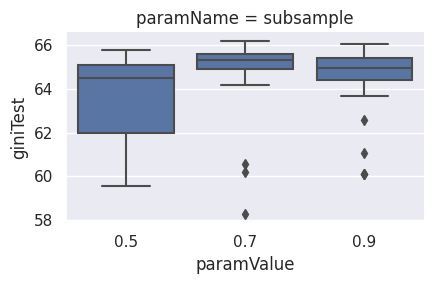

In [94]:
sns.FacetGrid(pdResults.loc[pdResults.paramName=='subsample'],
              row="paramName",
              sharex=False, aspect=1.5).\
          map(sns.boxplot,
              'paramValue',
              'giniTest')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


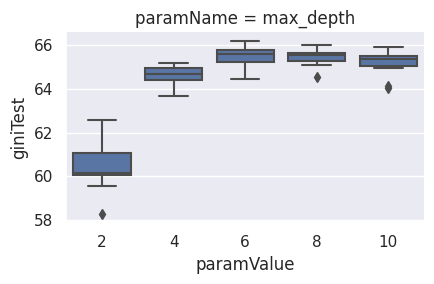

In [95]:
sns.FacetGrid(pdResults.loc[pdResults.paramName=='max_depth'],
              row="paramName",
              sharex=False, aspect=1.5).\
          map(sns.boxplot,
              'paramValue',
              'giniTest')

# Implementación de Modelos

In [97]:
import pickle

In [96]:
xgBoost

In [98]:
objectToSave = xgBoost
filename = "./XGBoost.xgb"
pickle.dump(objectToSave, open(filename, 'wb'))
print("done")

done


In [99]:
loaded_model

NameError: ignored

In [100]:
filename = "./XGBoost.xgb"
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
loaded_model

In [102]:
loaded_model.predict(xgb.DMatrix(X_test[features]))


array([0.03116459, 0.05116843, 0.02677903, ..., 0.13832839, 0.10668987,
       0.03122809], dtype=float32)

In [103]:
X_test[features][X_test.index == 14460]
loaded_model.predict(xgb.DMatrix(X_test[features][X_test.index == 14460]))

array([0.06072947], dtype=float32)

---

# Gracias por completar este laboratorio!

---

